# 🧪 Model Evaluation on Random Forest
Generated on 2025-04-18 07:37

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay,
                             classification_report, accuracy_score,
                             precision_score, recall_score, f1_score,
                             roc_auc_score, roc_curve)

np.random.seed(42)

## 1️⃣ Generate Synthetic Dataset

In [11]:
df = pd.DataFrame({
    'Age': np.random.randint(18, 70, 500),
    'Income': np.random.normal(50000, 15000, 500).astype(int),
    'Gender': np.random.choice([0, 1], 500),
    'Emergency_Admissions': np.random.randint(0, 50, 500),
    'Weekend': np.random.choice([0, 1], 500),
})
df['Purchased'] = ((df['Gender'] == 0) & (df['Emergency_Admissions'] > 25)).astype(int)
df.head()

,Age,Income,Gender,Emergency_Admissions,Weekend,Purchased
0,56,81832,0,1,0,0
1,69,65486,0,46,1,1
2,46,27209,0,13,1,0
3,32,42736,1,19,1,0
4,60,69003,0,21,1,0


## 2️⃣ Train-Test Split

In [12]:
X = df.drop(columns=['Purchased'])
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3️⃣ Train Random Forest

In [13]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 4️⃣ Predictions & Probabilities

In [14]:
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

print("y_pred:",y_pred)
print("y_proba:",y_proba)

y_pred: [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0
 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0]
y_proba: [0.   0.   0.   0.   0.01 0.01 0.   0.01 0.01 0.   0.   0.98 0.   0.02
 0.   0.02 0.98 0.   0.11 0.01 0.13 0.95 0.   0.01 0.   0.98 0.89 0.99
 0.04 0.   1.   0.99 0.   0.   0.   0.96 0.01 0.   0.   0.94 0.   0.
 0.   0.   0.01 1.   0.04 0.01 0.   0.95 0.   0.98 0.   0.   0.04 0.01
 0.91 0.   0.   0.99 0.96 0.   0.01 0.   0.98 0.93 0.   0.   0.   0.03
 0.01 0.   0.95 0.   0.96 0.   0.02 0.   0.03 0.97 0.   0.   0.   0.
 0.   0.   0.   1.   0.03 0.97 0.97 0.97 0.04 0.97 0.05 0.   0.99 0.99
 0.   0.02]


## 5️⃣ Confusion Matrix

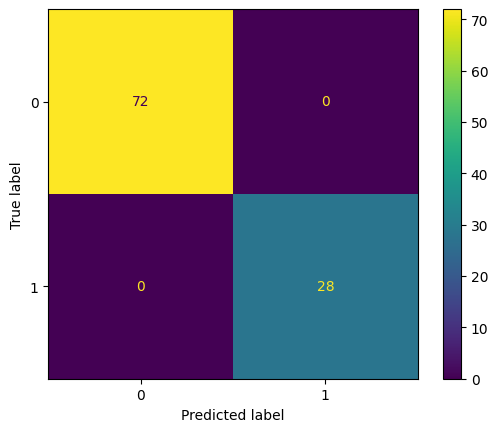

In [15]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

## 6️⃣ Classification Report

In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        28

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



## 7️⃣ ROC Curve & AUC Score

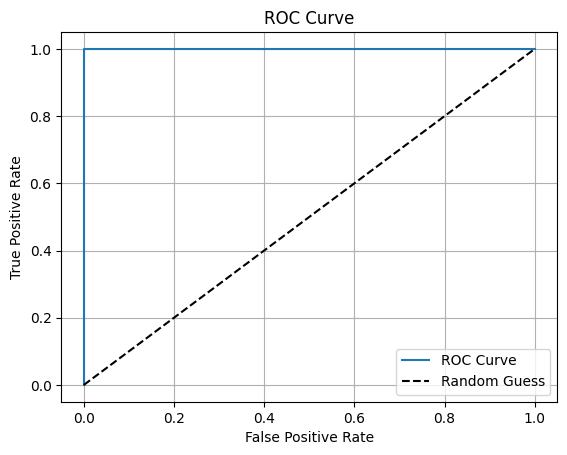

In [16]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# print("AUC Score:", roc_auc_score(y_test, y_proba))